<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Classification Art Category</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            align-items: center;
            background-color: #000;
            color: white;
        }
        h1 {
            font-size: 5em;
            font-weight: bold;
            text-align: center;
        }
    </style>
</head>
<body>
    <h1>Classification Art Category</h1>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sommaire - Classification Art</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #000;
            color: white;
            font-family: Arial, sans-serif;
        }
        h1 {
            font-weight: bold;
            text-align: center;
            margin-bottom: 20px;
            font-size: 3em;
        }
        ul {
            list-style-type: none;
            text-align: center;
            font-size: 2em;
            line-height: 2em;
            margin: 0;
            padding: 0;
        }
    </style>
</head>
<body>
    <h1>Sommaire</h1>
    <ul>
        <li>1. Présentation de la base de données</li>
        <li>2. DataLoader et Data Augmentation</li>
        <li>3. Reseau FC</li>
        <li>4. Reseau CNN</li>
        <li>5. Transfer Learning</li>
    </ul>
</body>
</html>

In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
import artlib
import os

NUM_CLASSES = 13
INPUT_SHAPE = (224,224)
INPUT_SHAPE_CNN = (128,128)
BATCH_SIZE = 64
DATASET_PATH = 'dataset_600'

classes = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]
classes

['Academic_Art',
 'Art_Nouveau',
 'Baroque',
 'Expressionism',
 'Japanese_Art',
 'Neoclassicism',
 'Primitivism',
 'Realism',
 'Renaissance',
 'Rococo',
 'Romanticism',
 'Symbolism',
 'Western_Medieval']

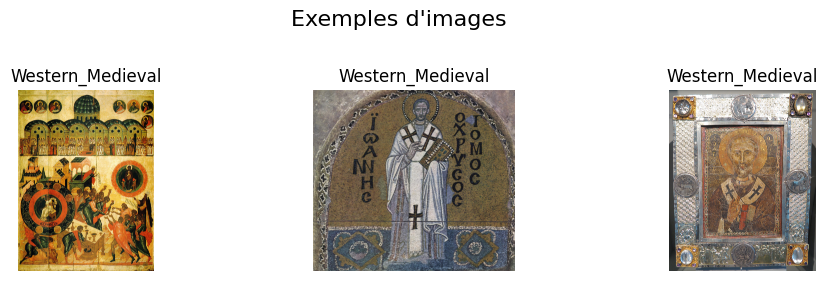

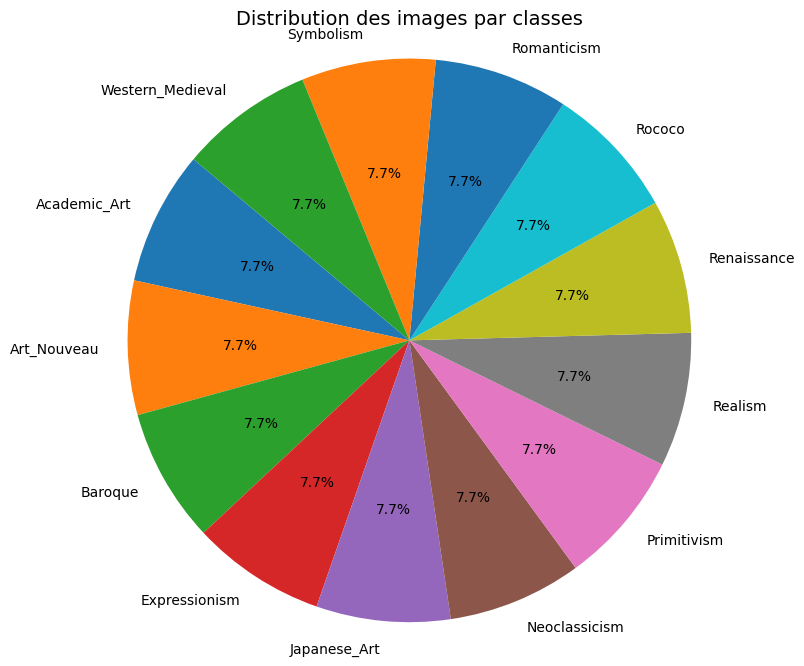

In [2]:
sample_images,class_counts = artlib.sample_images_class_count()
artlib.show_sample_images(sample_images)
artlib.plot_pie_chart(class_counts)

In [3]:
dataset_dictionnary = {"train":None,"valid":None,"train_data_augmentation":None}
dataset_dictionnary_cnn = {"train":None,"valid":None,"train_data_augmentation":None}

dataset_dictionnary["train"], dataset_dictionnary["valid"] = image_dataset_from_directory(
                        directory = DATASET_PATH,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

dataset_dictionnary_cnn["train"], dataset_dictionnary_cnn["valid"] = image_dataset_from_directory(
                        directory = DATASET_PATH,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE_CNN,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.
Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.


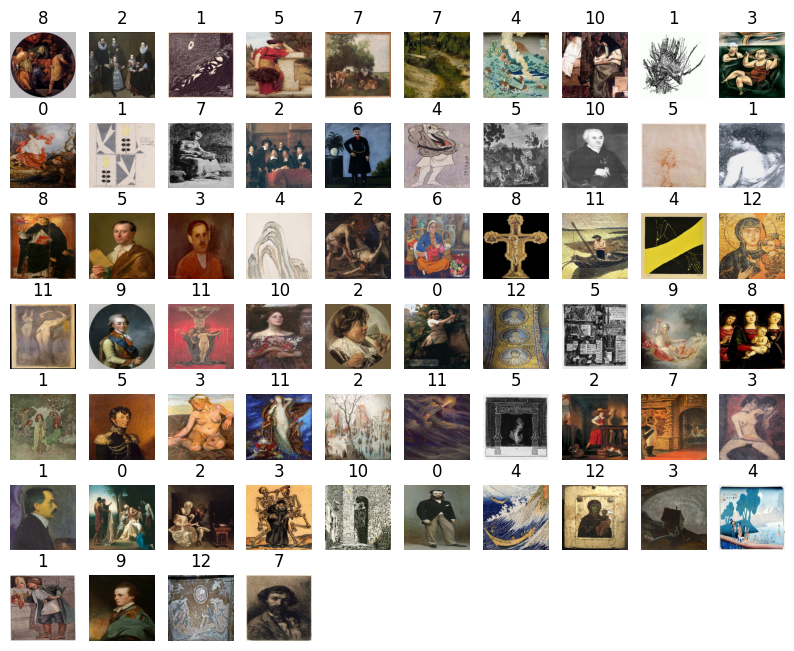

In [4]:
artlib.ShowSamples(dataset_dictionnary['train'])

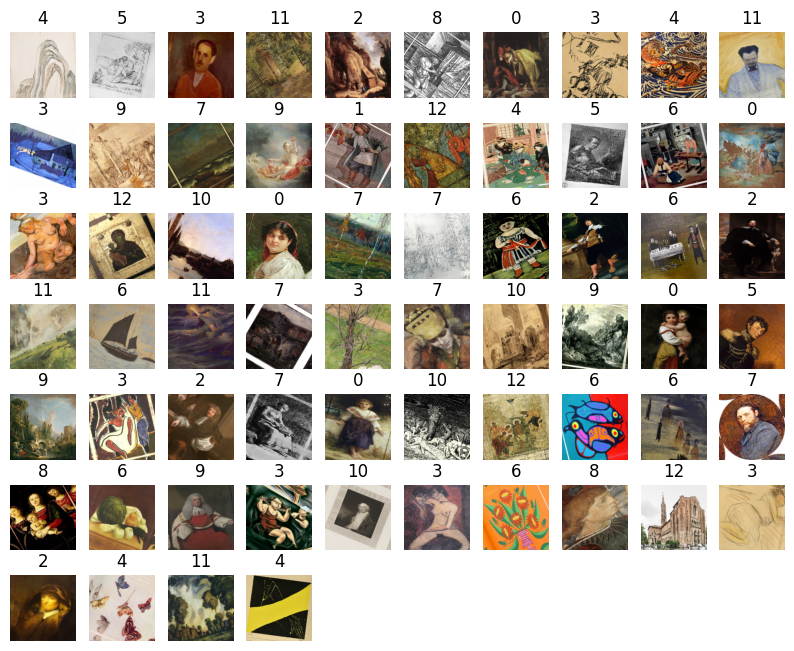

In [5]:
from artlib import dataset_augmentation

data_augmentation_layers = [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
dataset_dictionnary['train_data_augmentation'] = dataset_dictionnary['train'].map( lambda x, y: (dataset_augmentation(data_augmentation_layers,x), y))
dataset_dictionnary_cnn['train_data_augmentation'] = dataset_dictionnary_cnn['train'].map( lambda x, y: (dataset_augmentation(data_augmentation_layers,x), y))

artlib.ShowSamples(dataset_dictionnary['train_data_augmentation'])

# **Réseau - FC**

In [6]:
learning_rates = [0.01, 0.001, 0.0001]
epochs = [3]

print("✅ INPUT_SHAPE utilisé :", INPUT_SHAPE)
for x, y in dataset_dictionnary["train"].take(1):
    print("✅ Shape des entrées :", x.shape, "| Type :", x.dtype)

hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
df_results_fc, best_model_fc, best_history_fc = artlib.train_all_models(
    model_type="FC",
    hyperparams=hyperparams,
    dataset_dictionnary =dataset_dictionnary,
)

✅ INPUT_SHAPE utilisé : (224, 224)
✅ Shape des entrées : (64, 224, 224, 3) | Type : <dtype: 'float32'>
🔍 Entraînement avec les paramètres : {'epochs': 3, 'learning_rate': 0.01, 'dropout': True, 'data_augmentation': True}
🚀 Initialisation du modèle FC...
📊 Début de l'entraînement...
Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 702ms/step - accuracy: 0.1243 - loss: 2.7711 - val_accuracy: 0.0808 - val_loss: 3.3738
Epoch 2/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 677ms/step - accuracy: 0.1764 - loss: 2.4309 - val_accuracy: 0.1929 - val_loss: 2.3884
Epoch 3/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 650ms/step - accuracy: 0.1868 - loss: 2.3831 - val_accuracy: 0.1987 - val_loss: 2.3664
✅ Entraînement terminé.
🔍 Entraînement avec les paramètres : {'epochs': 3, 'learning_rate': 0.01, 'dropout': True, 'data_augmentation': False}
🚀 Initialisation du modèle FC...
📊 Début de l'entraînement...
Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 687ms/step - accuracy: 0.1414 - loss: 2.7534 - val_accuracy: 0.1167 - val_loss: 3.1922


In [7]:

df_sorted_fc = df_results_fc.sort_values(by="final_val_accuracy", ascending=False)
df_sorted_fc

,epochs,learning_rate,dropout,data_augmentation,final_loss,final_accuracy,final_val_loss,final_val_accuracy
6,3,0.0010,False,True,2.282775,0.243429,2.350425,0.223077
2,3,0.0100,False,True,2.337866,0.211218,2.358452,0.222436
3,3,0.0100,False,False,2.326643,0.215064,2.390028,0.221795
7,3,0.0010,False,False,2.273911,0.242628,2.395357,0.205769
5,3,0.0010,True,False,2.484507,0.176603,2.367517,0.204487
11,3,0.0001,False,False,2.299966,0.238301,2.522668,0.200000
0,3,0.0100,True,True,2.369972,0.202724,2.366396,0.198718
9,3,0.0001,True,False,2.793855,0.149840,2.428144,0.194872
1,3,0.0100,True,False,2.381472,0.194071,2.365766,0.187821
10,3,0.0001,False,True,2.284036,0.252244,2.546009,0.183333


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step


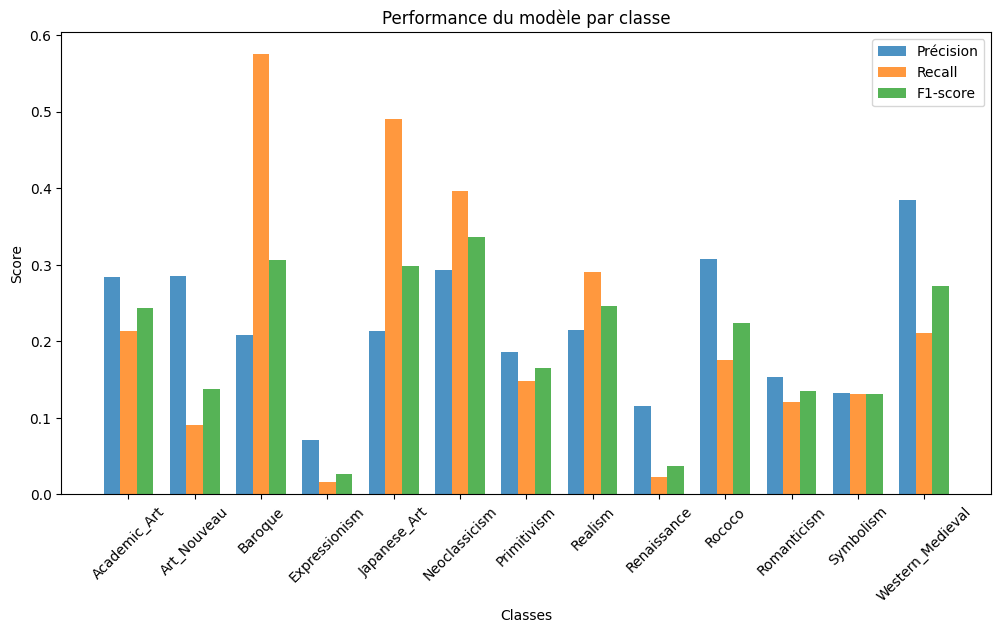

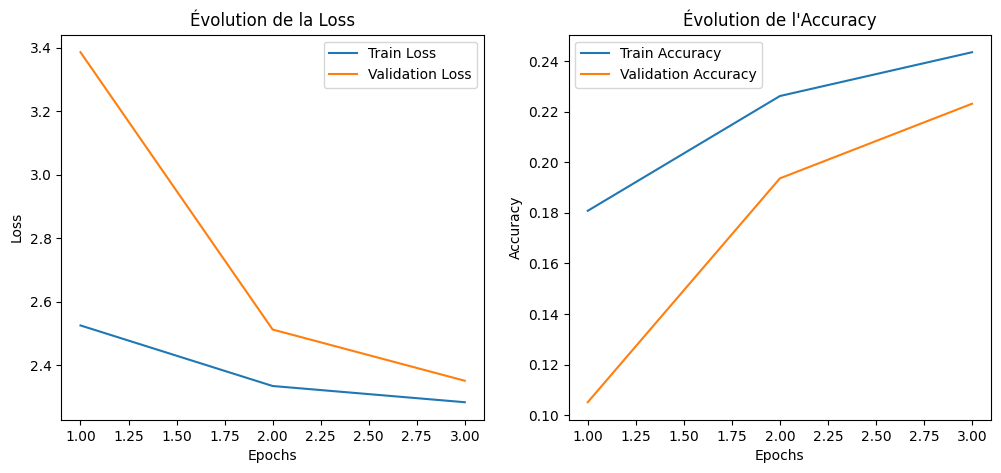

In [8]:
# ⚡ Afficher les performances du modèle sur chaque classe
artlib.plot_class_performance(best_model_fc, dataset_dictionnary["valid"], classes)

# 📊 Afficher la courbe d'apprentissage
artlib.plot_learning_curve(best_history_fc)

# **Réseau - CNN**

In [9]:
# learning_rates = [0.01, 0.001, 0.0001]
# epochs = [5]

# hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
# df_results_cnn, best_model_cnn, best_history_cnn = artlib.train_all_models(
#     model_type="CNN",
#     hyperparams=hyperparams,
#     dataset_dictionnary =dataset_dictionnary_cnn,
# )

In [10]:
# df_sorted_cnn = df_results_cnn.sort_values(by="final_val_accuracy", ascending=False)
# df_sorted_cnn

In [11]:
# # ⚡ Afficher les performances du modèle sur chaque classe
# artlib.plot_class_performance(best_model_cnn, dataset_dictionnary_cnn["valid"], classes)

# # 📊 Afficher la courbe d'apprentissage
# artlib.plot_learning_curve(best_history_cnn)

# **Réseau - TF**

In [12]:
learning_rates = [0.01, 0.001, 0.0001]
epochs = [3]

hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
df_results_tf, best_model_tf, best_history_tf = artlib.train_all_models(
    model_type="TF",
    hyperparams=hyperparams,
    dataset_dictionnary =dataset_dictionnary,
)

In [13]:
df_sorted_tf = df_results_tf.sort_values(by="final_val_accuracy", ascending=False)
df_sorted_tf

In [14]:
# ⚡ Afficher les performances du modèle sur chaque classe
artlib.plot_class_performance(best_model_tf, dataset_dictionnary["valid"], classes)

# 📊 Afficher la courbe d'apprentissage
artlib.plot_learning_curve(best_history_tf)